In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 设置全局字体
matplotlib.rcParams["font.family"] = "SimSun"


# def ts_profiling(df: pd.DataFrame, output_file: str = "profiling_report.html") -> None:
#     profile = ydata_profiling.ProfileReport(df, tsmode=True)
#     profile.to_file(output_file)


raw_data = pd.read_csv(r"data\qiyeshuju-4S间隔.csv", encoding="gbk")
raw_data.index = pd.to_datetime(raw_data["时间"])
raw_data.drop("时间", axis=1, inplace=True)

columns = raw_data.columns
print(columns)

C:\Users\glx\AppData\Local\Temp\ipykernel_82708\2165292760.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Index(['右侧换火信号', 'CEMS出口烟尘($mg/m^{3}$)', 'CEMS出口一氧化氮($mg/m^{3}$)',
       'VA.SO2($mg/m^{3}$)', 'VA.NOX($mg/m^{3}$)', 'CEMS出口含氧(%)', 'VA.O2(%)',
       'NOX转换值($mg/m^{3}$)', '氨水泵B频率反馈(Hz)', '1#线氨水流量(L/h)', 'C泵频率反馈(Hz)',
       '反应塔入口温度', '1#线氨水调节阀(L/h)', '反应塔出口温度', 'CCF出口温度', '氨水分段设定反馈($m^{3}/h$)',
       'CCF6温度', 'CCF5温度', 'CCF4温度', 'CCF3温度', 'CCF2温度', '出口CEMS温度', 'CCF1温度',
       'CCF7温度', '喷氨压缩空气压力', 'CCF1差压', 'CCF2差压', 'CCF3差压', 'CCF4差压', 'CCF5差压',
       '反应塔差压', 'CCF6差压', 'B变频器电流(A)', 'A变频器电流(A)', 'B输出频率(Hz)',
       '氨逃逸小时均值($mg/m^{3}$)', 'A输出频率(Hz)', 'CCF7差压', '烟气量($Nm^{3}/h$)',
       'CCF出口压力', 'CEMS出口流量(m/s)', '22出口CEMS温度', '22CEMS出口烟尘($mg/m^{3}$)',
       '出口CEMS湿度(%)', '22烟气量($Nm^{3}/h$)', '右侧换火信号-数值'],
      dtype='object')


<Axes: xlabel='时间'>

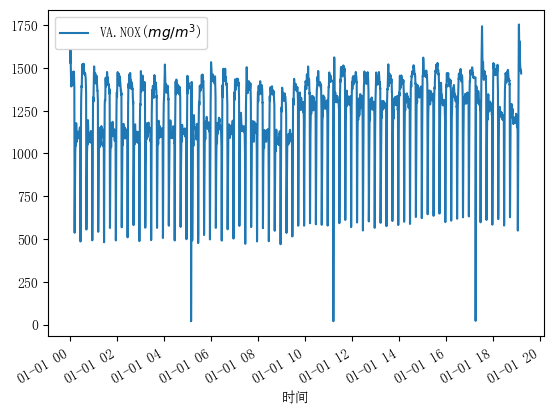

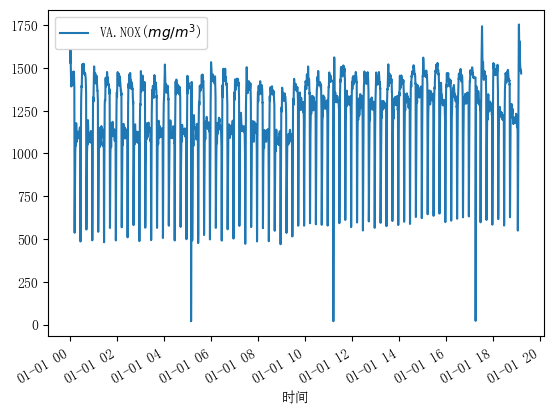

In [2]:
one_data = raw_data["2024-01-01 00:00:00":"2024-01-01 23:59:59"]
train_data = one_data[[r"VA.NOX($mg/m^{3}$)"]].iloc[:int(len(one_data)*0.8)] # 训练数据
test_data = one_data[[r"VA.NOX($mg/m^{3}$)"]].iloc[int(len(one_data)*0.8):] # 测试数据

train_data.plot()
train_data.plot()

In [ ]:
# 导入 pytorch 库
import torch
import torch.nn as nn

# 定义 LSTM 模型的类
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        # 设置模型的参数
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size
        # 定义 LSTM 层
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        # 定义输出层
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # 初始化隐藏状态和细胞状态
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        # 通过 LSTM 层得到输出和最终的隐藏状态和细胞状态
        out, (hn, cn) = self.lstm(x, (h0, c0))
        # 只取最后一个时间步的输出
        out = out[:, -1, :]
        # 通过输出层得到最终的预测
        out = self.fc(out)
        return out

# 定义模型的超参数
input_size = 1 # 输入特征的维度
hidden_size = 32 # 隐藏层的大小
num_layers = 2 # LSTM 层的个数
output_size = 1 # 输出特征的维度
learning_rate = 0.01 # 学习率
num_epochs = 100 # 训练的轮数
window_size = 10 # 窗口大小，用于将时序数据转换为监督学习数据

# 创建模型的实例
model = LSTM(input_size, hidden_size, num_layers, output_size)

# 定义损失函数，这里使用均方误差
criterion = nn.MSELoss()

# 定义优化器，这里使用随机梯度下降
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 将 pandas 数据框转换为 numpy 数组
train_data = train_df.values
test_data = test_df.values

# 定义一个函数，用于将时序数据转换为监督学习数据
def create_dataset(data, window_size):
    x = [] # 存储输入数据
    y = [] # 存储输出数据
    for i in range(len(data) - window_size):
        # 用连续的 window_size 个数据作为输入
        x.append(data[i:i+window_size])
        # 用下一个数据作为输出
        y.append(data[i+window_size])
    # 将列表转换为 numpy 数组
    x = np.array(x)
    y = np.array(y)
    # 将 numpy 数组转换为 pytorch 张量
    x = torch.from_numpy(x).float()
    y = torch.from_numpy(y).float()
    return x, y

# 使用窗口大小为 10，将训练数据和测试数据转换为监督学习数据
x_train, y_train = create_dataset(train_data, window_size)
x_test, y_test = create_dataset(test_data, window_size)

# 训练模型
for epoch in range(num_epochs):
    # 将输入数据和输出数据传入模型，得到预测
    y_pred = model(x_train)
    # 计算损失
    loss = criterion(y_pred, y_train)
    # 清空梯度
    optimizer.zero_grad()
    # 反向传播
    loss.backward()
    # 更新参数
    optimizer.step()
    # 打印每轮的损失
    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

# 测试模型
# 将模型设为评估模式
model.eval()
# 用测试数据进行预测
y_pred = model(x_test)
# 计算测试损失
test_loss = criterion(y_pred, y_test)
# 打印测试损失
print(f'Test Loss: {test_loss.item():.4f}')
